## Download data for income and housing from [Data USA](https://datausa.io/)
https://datausa.io/

In [1]:
#import library to query Data USA (https://datausa.io/)
import requests

#import pandas (so we can make a data frame and write to .csv)
import pandas as pd

# import libraries and use magic for plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# get property data from state level for 2015
prop_url = "http://api.datausa.io/api/?show=geo&sumlevel=state&required=income,median_property_value,pop,mean_commute_minutes,owner_occupied_housing_units,non_eng_speakers_pct&year=2015"
prop_json = requests.get(prop_url).json()
prop_data = [dict(zip(prop_json["headers"], d)) for d in prop_json["data"]]

In [3]:
# make a data frame
prop_datadf = pd.DataFrame(prop_data)
prop_datadf.rename(columns={'geo': 'id'}, inplace=True)
prop_datadf.head()

,id,income,mean_commute_minutes,median_property_value,non_eng_speakers_pct,owner_occupied_housing_units,pop,year
0,04000US02,72515.0,18.1625,250000.0,0.161961,0.633768,733375,2015
1,04000US01,43623.0,23.6796,125500.0,0.051932,0.686646,4830620,2015
2,04000US05,41371.0,20.9376,111400.0,0.072253,0.661068,2958208,2015
3,04000US04,50255.0,23.4306,167500.0,0.269232,0.627582,6641928,2015
4,04000US06,61818.0,26.4598,385500.0,0.439091,0.543268,38421464,2015


In [4]:
# get location names for state level
geo_url = "https://api.datausa.io/attrs/geo/?show=geo&sumlevel=state"
geo_json = requests.get(geo_url).json()
geo_data = [dict(zip(geo_json["headers"], d)) for d in geo_json["data"]]

In [5]:
# make a data frame
geo_datadf = pd.DataFrame(geo_data)
geo_datadf.head()

,display_name,id,image_author,image_link,image_meta,name,name_long,sumlevel,url_name
0,Texas,04000US48,Corbet Ratcliff,https://flic.kr/p/brgaa9,"A Texas longhorn in Latexo, Texas",Texas,Texas,040,texas
1,Pennsylvania,04000US42,Alex,https://flic.kr/p/8MY3vg,"Farm, hills and grasslands in rural Pennsylvania.",Pennsylvania,Pennsylvania,040,pennsylvania
2,South Carolina,04000US45,Alacrity1980,https://flic.kr/p/7pK9Xt,Sunset over The Battery and a row of Palmetto ...,South Carolina,South Carolina,040,south-carolina
3,New Hampshire,04000US33,Nicholas Erwin,https://flic.kr/p/e4P4bv,"Mt Washington, part of the presidential range ...",New Hampshire,New Hampshire,040,new-hampshire
4,Kansas,04000US20,Garett Gabriel,https://flic.kr/p/b2DTAn,None,Kansas,Kansas,040,kansas


In [6]:
# merge datasets to get state names
indexed_prop = prop_datadf.set_index(['id'])
indexed_geo = geo_datadf.set_index(['id'])

In [7]:
indexed_geo = indexed_geo[['display_name']]
merged_dfs = pd.merge(indexed_prop, indexed_geo, left_index=True, right_index=True)
merged_dfs.set_index('display_name', inplace=True)
merged_dfs.head()

,income,mean_commute_minutes,median_property_value,non_eng_speakers_pct,owner_occupied_housing_units,pop,year
display_name,,,,,,,
Texas,53207.0,24.5090,136000.0,0.350348,0.622325,26538614,2015
Pennsylvania,53599.0,25.2695,166000.0,0.106482,0.692052,12779559,2015
South Carolina,45483.0,23.0552,139900.0,0.068677,0.685914,4777576,2015
New Hampshire,66779.0,25.2973,237300.0,0.078682,0.709609,1324201,2015
Kansas,52205.0,18.2779,132000.0,0.113053,0.666891,2892987,2015


In [8]:
# write to csv
merged_dfs.to_csv('acs_data.csv')

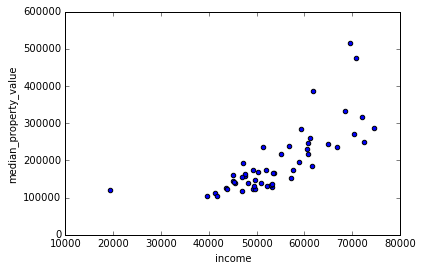

In [9]:
# Explore property data via scatter plots
prop_datadf.plot.scatter('income', 'median_property_value')

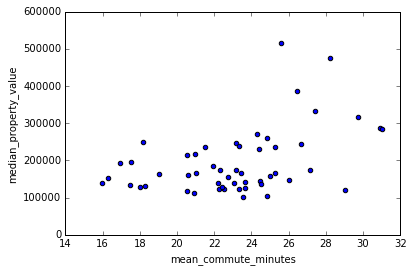

In [10]:
prop_datadf.plot.scatter('mean_commute_minutes', 'median_property_value')

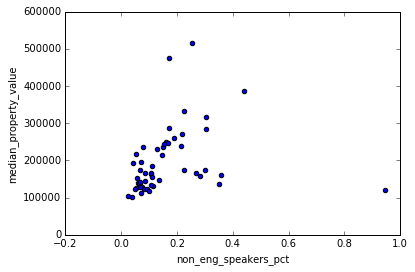

In [11]:
prop_datadf.plot.scatter('non_eng_speakers_pct', 'median_property_value')

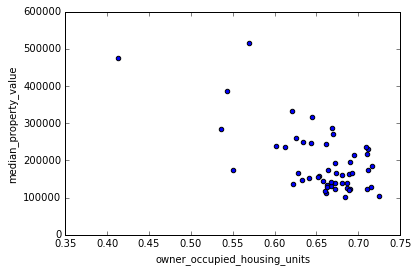

In [12]:
prop_datadf.plot.scatter('owner_occupied_housing_units', 'median_property_value')


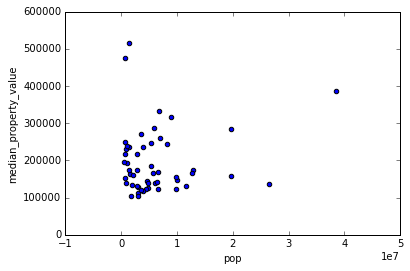

In [13]:
prop_datadf.plot.scatter('pop', 'median_property_value')